# Exercise 4: LMS algorithm for stock price prediction

## 4.1 Introduction

In this exercise the *trainlms* function given below will be used.

**Tasks**

1. What does the function *trainlms* do?

In [2]:
import numpy as np

def predict(W, A):
    return W@np.vstack([-np.ones((1, A.shape[1])), A])

def trainlms(ni, x, d, W, max_epoch):
    w=W.copy()  # Copy of weights to not change original weights
    
    n=0  # Iterations number
    errors=[]
    while (n<max_epoch):
        n+=1  # Increase iteractions number
        y=predict(w, x)  # Make prediction based on current weights and input values
        e=d-y # Calculate error matrix -> desired - expected outputs
        w+=ni*e@np.vstack([-np.ones((1, x.shape[1])), x]).T  # Update errors: learning_rate * error
        error=np.sum(np.square(e)) 
        errors.append(error)
        if (error<0.02):
            break
    return w, errors

## 4.2 Stock price movement

In this experiment we will use the LMS algorithm in order to predict the stock price for a given stock. Load the data from file *stock.txt* into variable *data*. Numbers (elements of vector *data*) show the movement of average daily price of the given share in time. Plot the variable *data* using the following commands:

Mounted at /content/gdrive
/content/gdrive/My Drive/MIEIC/NN/exercise2[1]
[183.35 210.26 214.58 214.36 229.04 199.32 203.02 213.71 201.54 245.35
 219.03 238.02 222.02 205.7  174.35 190.18 203.97 215.83 231.49 214.84
 202.23 173.53 181.16 148.12 178.15 179.09 190.47 190.73 155.93 156.66
 138.9  166.83 151.45 165.21 206.64 170.25 158.17 146.52 140.63 163.85
 189.44 212.95 219.97 213.68 192.39 189.87 195.83 185.06 192.2  226.31
 210.14 203.82 198.05 188.79 181.04 165.08 176.82 194.66 215.64 193.73
 193.16 180.14 149.81 138.93 171.2  190.08 176.88 176.37 150.28 164.23
 139.97 148.53 150.8  161.31 167.55 194.3  180.83 146.55 171.8  172.52
 188.95 219.83 190.75 203.71 195.17 187.47 163.97 194.88 186.25 221.66
 234.34 219.65 210.34 179.24 189.42 183.05 184.15 206.99 205.8  196.47
 194.92 174.1  161.27 156.88 194.45 206.79 188.01 194.26 185.98 178.62
 171.61 156.83 163.33 204.55 185.24 183.74 180.39 189.12 176.08 185.65
 217.03 220.8  207.63 237.17 218.2  201.81 190.05 197.65 222.42 227.66
 22

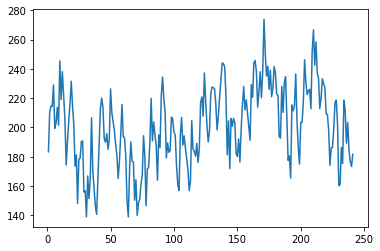

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/MIEIC/NN/exercise2[1]
data=np.loadtxt("stock.txt", delimiter=",")

print(data)

import matplotlib.pyplot as plt
plt.plot(range(1, data.shape[0]+1), data)
plt.show()

The goal of this exercise is to use several (let us say $N$) previous share prices in order to predict the share price for today. This is useful because we can buy or sell the price before its price rises or falls and in that way increase our profit or lower our loss. The first step is to find the input-output pairs, which will be used on order to train our network. The size of this set will be defined using variable $i$. Our inputs will be vectors $\mathbf{a}_i$, which we put in matrix $\mathbf{A}$. Outputs are scalar values, which we put in vector $y$.

**Tasks**

1. Write the function *memory*, which for given day in the year (index of the variable *data*) constructs a column vector $\mathbf{a}$ whose elements represent the prices for last *N* days but without the price for today.
2. Using the function *memory* write a function *memorize*, which for given inputs (*data*, *day*, *N*, *i*) constructs the matrix $\mathbf{A}$ in which each column vector represents the $\mathbf{a}_i$ for the previous day. So, matrix $\mathbf{A}$ memorizes $i$ memories which we will use in order to train our network.

In [4]:
# WRITE YOUR CODE HERE
def memory(data, day, N):
  return np.array([data[day-N: day]]).T

def memorize(data, day, N, i):
  A = memory(data, day-i, N)
  for j in range(day-i+1, day):
    A = np.hstack([A, memory(data, j, N)])
  return A
# memory(data, 5, 3)
print(memorize(data, 10, 3, 5))
print()
print(data)

[[214.58 214.36 229.04 199.32 203.02]
 [214.36 229.04 199.32 203.02 213.71]
 [229.04 199.32 203.02 213.71 201.54]]

[183.35 210.26 214.58 214.36 229.04 199.32 203.02 213.71 201.54 245.35
 219.03 238.02 222.02 205.7  174.35 190.18 203.97 215.83 231.49 214.84
 202.23 173.53 181.16 148.12 178.15 179.09 190.47 190.73 155.93 156.66
 138.9  166.83 151.45 165.21 206.64 170.25 158.17 146.52 140.63 163.85
 189.44 212.95 219.97 213.68 192.39 189.87 195.83 185.06 192.2  226.31
 210.14 203.82 198.05 188.79 181.04 165.08 176.82 194.66 215.64 193.73
 193.16 180.14 149.81 138.93 171.2  190.08 176.88 176.37 150.28 164.23
 139.97 148.53 150.8  161.31 167.55 194.3  180.83 146.55 171.8  172.52
 188.95 219.83 190.75 203.71 195.17 187.47 163.97 194.88 186.25 221.66
 234.34 219.65 210.34 179.24 189.42 183.05 184.15 206.99 205.8  196.47
 194.92 174.1  161.27 156.88 194.45 206.79 188.01 194.26 185.98 178.62
 171.61 156.83 163.33 204.55 185.24 183.74 180.39 189.12 176.08 185.65
 217.03 220.8  207.63 237.17 218

In [5]:
memory(data, 150, 100)

array([[210.14],
       [203.82],
       [198.05],
       [188.79],
       [181.04],
       [165.08],
       [176.82],
       [194.66],
       [215.64],
       [193.73],
       [193.16],
       [180.14],
       [149.81],
       [138.93],
       [171.2 ],
       [190.08],
       [176.88],
       [176.37],
       [150.28],
       [164.23],
       [139.97],
       [148.53],
       [150.8 ],
       [161.31],
       [167.55],
       [194.3 ],
       [180.83],
       [146.55],
       [171.8 ],
       [172.52],
       [188.95],
       [219.83],
       [190.75],
       [203.71],
       [195.17],
       [187.47],
       [163.97],
       [194.88],
       [186.25],
       [221.66],
       [234.34],
       [219.65],
       [210.34],
       [179.24],
       [189.42],
       [183.05],
       [184.15],
       [206.99],
       [205.8 ],
       [196.47],
       [194.92],
       [174.1 ],
       [161.27],
       [156.88],
       [194.45],
       [206.79],
       [188.01],
       [194.26],
       [185.98

Construct the matrix $\mathbf{A}$ using the command:

In [6]:
day=151
N=70  # rows
i=50  # columns
A=memorize(data, day, N, i)
print(A)
print(A.shape)

[[166.83 151.45 165.21 ... 171.8  172.52 188.95]
 [151.45 165.21 206.64 ... 172.52 188.95 219.83]
 [165.21 206.64 170.25 ... 188.95 219.83 190.75]
 ...
 [205.8  196.47 194.92 ... 200.78 206.16 202.9 ]
 [196.47 194.92 174.1  ... 206.16 202.9  182.28]
 [194.92 174.1  161.27 ... 202.9  182.28 180.14]]
(70, 50)


The output vector is constructed using the command:

In [7]:
y=np.array([data[day-i+1:day+1]])
print(y)
print(y.size)

[[161.27 156.88 194.45 206.79 188.01 194.26 185.98 178.62 171.61 156.83
  163.33 204.55 185.24 183.74 180.39 189.12 176.08 185.65 217.03 220.8
  207.63 237.17 218.2  201.81 190.05 197.65 222.42 227.66 227.12 226.35
  215.54 198.27 207.58 220.6  232.32 243.92 243.58 241.19 221.24 181.33
  204.45 171.85 206.02 200.78 206.16 202.9  182.28 180.14 192.17 176.4 ]]
50


We initialize the perceptron as follows:

In [8]:
def initp(data, labels):
    return -0.5+np.random.rand(labels.shape[0], data.shape[0]+1)

W=initp(A, y)
print(W.shape)
print(W)

(1, 71)
[[-0.06171399  0.35125605 -0.13512508 -0.24866472  0.18463623 -0.271785
  -0.28663398  0.46642942 -0.14475528  0.44829069  0.29439056 -0.40570739
  -0.30494436 -0.09222045  0.05898139  0.10019228  0.45747694 -0.46328016
  -0.10695345  0.44073231  0.17367056  0.4899253   0.36996897 -0.21732194
   0.02820784  0.426137   -0.16768497 -0.12885521 -0.45112943 -0.42737267
   0.33818432 -0.47475471  0.13590505  0.18068091  0.1460136  -0.49063275
  -0.38732883 -0.21246067  0.01818115 -0.05152317 -0.09544313 -0.22341105
   0.47029731  0.02559209 -0.05516671 -0.06046263 -0.312697   -0.42239957
   0.20480771  0.41084516 -0.08668008  0.31690249  0.15202972 -0.22940193
   0.4126638   0.32097929  0.01981942  0.2623448  -0.12609177 -0.13779688
   0.48242694  0.06998307 -0.39348922  0.06840668 -0.21487463  0.44594045
  -0.36379099  0.32164475 -0.08652486  0.00915577  0.49982395]]


We train the perceptron using the command:

In [9]:
ni=1e-8
max_num_iter=10000

W1, errors=trainlms(ni, A, y, W, max_num_iter)
print('W1: ', W1)
print('errors: ', errors)
print('last error: ', errors[-1])

W1:  [[-0.06193893  0.20695211  0.01119501 -0.03199328 -0.03881222 -0.10306463
  -0.13551633  0.2876752  -0.12525184  0.27150786 -0.16872782 -0.3185748
  -0.24537866 -0.08297354  0.05709266 -0.04632961  0.16457275 -0.13306799
  -0.2117784   0.12871045  0.12077431  0.18889251  0.23961008 -0.22365603
   0.17682659  0.06655945 -0.04979509  0.12387847 -0.17600283 -0.17918228
   0.20989725 -0.2981615   0.3101457   0.25714794  0.27670141 -0.1742661
  -0.34906085  0.12283632  0.14199285 -0.10875846  0.06431517 -0.29464172
   0.36716847  0.41199318  0.07676616 -0.00472175 -0.15371529 -0.23218168
  -0.02791105  0.17597115 -0.19012284  0.12198468 -0.05797113 -0.19968932
   0.26915618  0.15904177  0.08489574  0.19259593 -0.10584263 -0.10936297
   0.34880899  0.09099404 -0.27186149 -0.11717019 -0.24148137  0.20801607
  -0.26757508  0.19671162 -0.10791815  0.1144701   0.38681769]]
errors:  [421438.51352345914, 195540.39999796802, 180957.57754711708, 179393.8778075022, 178635.58206238644, 177930.389

Weights of the network are memorized in the matrix $\mathbf{W}_1$. Variable *ni* should be experimentally found. Train the network for different values of *i*, *N*, *max_num_iter*. We can visualize the output of the network on the training data using the following command:

[161.27 156.88 194.45 206.79 188.01 194.26 185.98 178.62 171.61 156.83
 163.33 204.55 185.24 183.74 180.39 189.12 176.08 185.65 217.03 220.8
 207.63 237.17 218.2  201.81 190.05 197.65 222.42 227.66 227.12 226.35
 215.54 198.27 207.58 220.6  232.32 243.92 243.58 241.19 221.24 181.33
 204.45 171.85 206.02 200.78 206.16 202.9  182.28 180.14 192.17 176.4 ]


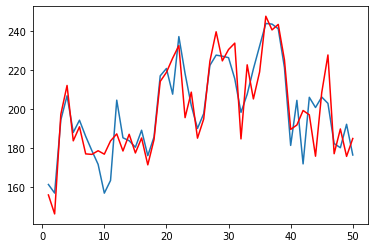

In [10]:
p=predict(W1, A)

print(y[0])

plt.plot(range(1, y[0].shape[0]+1), y[0])
plt.plot(range(1, p[0].shape[0]+1), p[0], c="red")
plt.show()

Here, the blue color shows the predicted values and the red color shows the real outputs.

**Tasks**

1. Memorize different weight matrices ($\mathbf{W}_1$, $\mathbf{W}_2$...) with different combinations of following parameters *i*=30, 50 or 100; *N*=20, 50 or 80; *max_num_iter*=10000, 50000 or 500000. (Choose 6 different combinations.) For selected parameter combinations show the obtained predictions with real values. Comment the obtained results.

In [20]:
# WRITE YOUR CODE HERE
# Error on 100 80 10000 -> N < days - i
import itertools

i_set, N_set, iter_set = [30, 50, 100], [20, 50, 80], [10000, 50000, 500000]

w_err = []
for i, N, max_num_iter in itertools.product(i_set, N_set, iter_set):
  if i == 100 and N == 80:
    break
  print(i, N, max_num_iter)
  A = memorize(data, day, N, i)
  y = np.array([data[day-i+1:day+1]])
  W = initp(A, y)
  W1, errors = trainlms(ni, A, y, W, max_num_iter)
  print(W1, errors[-1])
  w_err.append((W1, errors[-1]))


30 20 10000
[[-0.2469289   0.15648488 -0.36794094  0.14259924 -0.34651023  0.32819402
  -0.10952392  0.56633183 -0.13528792 -0.21002076 -0.26860811 -0.05438088
  -0.08223186  0.24797323  0.30911276 -0.2234879   0.36103648 -0.18941642
   0.41553321  0.22948346  0.21592611]] 7170.487011878783
30 20 50000
[[ 0.42163692 -0.02790138 -0.29889384  0.10211489 -0.41841779 -0.05565707
   0.15754631  0.53897828  0.32360285 -0.23841172 -0.17634719 -0.01997934
   0.07363726 -0.16664457  0.24488104 -0.08316843  0.05400399  0.07793432
  -0.08732233  0.27174977  0.71036781]] 2283.9875042675876
30 20 500000
[[ 0.0897906  -0.06075459 -0.00288225  0.36705212 -0.71192816 -0.29127235
   0.00404821  0.6511548   0.44499064 -0.34825865 -0.1418425   0.05580482
   0.11941814 -0.34648913  0.24316185  0.0482158   0.21181049 -0.11327526
  -0.59965127  0.27165875  1.18722492]] 1515.5034420030686
30 50 10000
[[-0.1195926  -0.01940732 -0.05425349 -0.17669896  0.62573163  0.55107652
   0.28492622  0.22451744 -0.147179

If we do not use any intelligence for stock price prediction and we assume the price will be (almost) the same tomorrow, the error we make is:

In [12]:
a=data[day:day+1]          # price today - we assume the same price tomorrow
y=data[day+1:day+2]        # the real price tomorrow
print(a, y)
err_oo=np.sum(np.abs(y-a)) # error
err_oo

[176.4] [199.22]


22.819999999999993

If we use the network trained on previous days to predict the price for tomorrow, the error is as follows:

In [13]:
p=predict(W1, memorize(data, day+1, N, 1))
print(p)
err_nn=np.sum(np.abs(y-p))
err_nn

[[211.28620235]]


12.06620235232478

If we trade each day with the given stock, our error can be easily measured. Our potential profit can be calculated as follows:

In [14]:
profit=err_oo-err_nn
print(profit)

10.753797647675214


To predict the price of the day after tomorrow, we could use the same network or we could train the network from scratch by also using the data of the day before the day after tomorrow i.e. by using the data of tomorrow. Which way would be better?

**Tasks**

1. Create a table in which you will show the obtained profit levels depending on the parameters used (*i*, *N*, and *max_num_iter*). For of these parameter triplets the profit should be the sum of the profit for every possible *day* for which training data defined by *i* and *N* exists.
  - Not interest in future predicted profit, but instead the profit from the training data?

In [18]:
# For one iteration
i, N, max_num_iter = 30, 20, 10000

A = memorize(data, day, N, i)
y = np.array([data[day-i+1:day+1]])
W = initp(A, y)
W1, errors = trainlms(ni, A, y, W, max_num_iter)
p = predict(W1, memorize(data, day+1, N, 1))
err_nn=np.sum(np.abs(data[day+1:day+2]-p))

profit=err_oo-err_nn
profit

15.462151672204726

In [19]:
# WRITE YOUR CODE HERE
import itertools
from tabulate import tabulate


i_set, N_set, iter_set = [30, 50, 100], [20, 50, 80], [10000, 50000, 500000]

table_data = [['i', 'N', 'max_num_iter', 'profit']]

for i, N, max_num_iter in itertools.product(i_set, N_set, iter_set):
  if i == 100 and N == 80:
    break
  print(i, N, max_num_iter)
  A = memorize(data, day, N, i)
  y = np.array([data[day-i+1:day+1]])
  W = initp(A, y)
  W1, errors = trainlms(ni, A, y, W, max_num_iter)
  p = predict(W1, memorize(data, day+1, N, 1))
  err_nn=np.sum(np.abs(data[day+1:day+2]-p))  
  profit=err_oo-err_nn
  table_data.append([i, N, max_num_iter, profit])

print(tabulate(table_data, headers='firstrow', tablefmt='fancy_grid'))


30 20 10000
30 20 50000
30 20 500000
30 50 10000
30 50 50000
30 50 500000
30 80 10000
30 80 50000
30 80 500000
50 20 10000
50 20 50000
50 20 500000
50 50 10000
50 50 50000
50 50 500000
50 80 10000
50 80 50000
50 80 500000
100 20 10000
100 20 50000
100 20 500000
100 50 10000
100 50 50000
100 50 500000
╒═════╤═════╤════════════════╤════════════╕
│   i │   N │   max_num_iter │     profit │
╞═════╪═════╪════════════════╪════════════╡
│  30 │  20 │          10000 │  18.5627   │
├─────┼─────┼────────────────┼────────────┤
│  30 │  20 │          50000 │  17.9281   │
├─────┼─────┼────────────────┼────────────┤
│  30 │  20 │         500000 │  -0.156982 │
├─────┼─────┼────────────────┼────────────┤
│  30 │  50 │          10000 │ -21.8357   │
├─────┼─────┼────────────────┼────────────┤
│  30 │  50 │          50000 │   6.06622  │
├─────┼─────┼────────────────┼────────────┤
│  30 │  50 │         500000 │ -25.0374   │
├─────┼─────┼────────────────┼────────────┤
│  30 │  80 │          10000 │  11.083